# Heart Disease Prediction using Machine Learning Approach

Heart Disease (including Coronary Heart Disease, Hypertension, and Stroke) remains the No. 1

cause of death in the US.The Heart Disease and Stroke Statistics—2019 Update from the **American Heart Association** indicates that:

 116.4 million, or 46% of US adults are estimated to have hypertension. These are findings related to the new 2017 Hypertension Clinical Practice Guidelines.
 
 On average, someone dies of CVD every 38 seconds. About 2,303 deaths from CVD each day, based on 2016 data.
 
 On average, someone dies of a stroke every 3.70 minutes. About 389.4 deaths from stroke each day, based on 2016 data.

In this notebook i will try to take useful insights using this heart disease datasets and by building ensemble model.

This notebook is divided into 13 major steps which are as follows:

1. Data description
2. Importing Libraries & setting up environment
3. Loading dataset
4. Data Cleaning and Preprocessing
5. Exploratory Data Analysis
6. Outlier Detection and Removal
7. Training and Testing Spliting
8. Cross validation
9. Model Building
10. Model evaluation and comparision
11. Feature Selection and Model Evalution
12. Conclusion
13. Saving the Model

# 1. Data description

This dataset consists of 11 features and a target variable. It has 6 nominal variables and 5 numeric variables. The detailed description of all the features are as follows:

1. Age: Age of the individual in year (Numeric)
    
2. Sex: displays the gender of the individual using the following format :
    1 = male
    0 = female (Nominal)
    
3. Chest-pain type: displays the type of chest-pain experienced by the individual using the following format :
    1 = typical angina, 
    2 = atypical angina, 
    3 = non — anginal pain, 
    4 = asymptotic (Nominal)
    
4. Resting Blood Pressure: displays the resting blood pressure value of an individual in mmHg (unit) (Numeric)
    
5. Serum Cholestrol: displays the serum cholesterol in mg/dl (unit) (Numeric)
    
6. Fasting Blood Sugar: compares the fasting blood sugar value of an individual with 120mg/dl.
    If fasting blood sugar > 120mg/dl then : 1 (true), 
    else : 0 (false) (Nominal)
    
7. Resting ECG : displays resting electrocardiographic results
    0 = normal, 
    1 = having ST-T wave abnormality, 
    2 = left ventricular hyperthrophy (Nominal)
    
8. Max heart rate achieved : displays the max heart rate achieved by an individual. (Numeric)
    
9. Exercise induced angina (Nominal) :
    1 = yes, 
    0 = no 
    
10. Old peak: ST depression induced by exercise relative to rest (Nominal)

11. Peak exercise ST segment : ST segment measured in terms of slope during peak exercise (Nominal)
    0 = Normal, 
    1 = upsloping, 
    2 = flat, 
    3 = downsloping

### Target Variable:

12. Target: It is the target variable which we have to predict 1 means individual is suffering from heart risk and 0 means individual is normal.

# 2. Importing Libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')

# data wrangling & pre-processing
import pandas as pd
import numpy as np

# data visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Training and Testing split
from sklearn.model_selection import train_test_split

#model validation
from sklearn.metrics import log_loss,roc_auc_score,precision_score,f1_score,recall_score,roc_curve,auc
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score,fbeta_score,matthews_corrcoef
from sklearn import metrics

# cross validation
from sklearn.model_selection import StratifiedKFold

# machine learning algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb

# for outlier calculations
from scipy import stats

# 3. Loading Dataset

In [2]:
df = pd.read_csv('heart_statlog_cleveland_hungary_final.csv')

Lets see some of the sample entries of dataset

In [3]:
df.head(5)

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0


As we can see from above dataset entries some of the features should be nominal and to be encoded as their category type. In the next step we will be encoding features to their respective category as per the dataset description.

# 4. Data Cleaning and Preprocessing

In this step we will first change the name of columns as some of the columns have weird naming pattern and then we will encode the features into categorical variables

In [4]:
# renaming features to proper name
df.columns = ['age', 'sex', 'chest_pain_type', 'resting_blood_pressure', 'cholesterol', 'fasting_blood_sugar', 'rest_ecg', 'max_heart_rate_achieved',
       'exercise_induced_angina', 'st_depression', 'st_slope','target']

In [5]:
df.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0


In [6]:
# converting features to categorical features 

# df['chest_pain_type'][3] = 4 so works the same
df['chest_pain_type'][df['chest_pain_type'] == 1] = 'typical angina'
df['chest_pain_type'][df['chest_pain_type'] == 2] = 'atypical angina'
df['chest_pain_type'][df['chest_pain_type'] == 3] = 'non-anginal pain'
df['chest_pain_type'][df['chest_pain_type'] == 4] = 'asymptomatic'

df['rest_ecg'][df['rest_ecg'] == 0] = 'normal'
df['rest_ecg'][df['rest_ecg'] == 1] = 'ST-T wave abnormality'
df['rest_ecg'][df['rest_ecg'] == 2] = 'left ventricular hypertrophy'

df['st_slope'][df['st_slope'] == 1] = 'upsloping'
df['st_slope'][df['st_slope'] == 2] = 'flat'
df['st_slope'][df['st_slope'] == 3] = 'downsloping'

df['sex'][df['sex'] == 1] = 'male'
df['sex'][df['sex'] == 0] = 'female'

In [7]:
df['chest_pain_type'].value_counts()

asymptomatic        625
non-anginal pain    283
atypical angina     216
typical angina       66
Name: chest_pain_type, dtype: int64

In [8]:
df['st_slope'].value_counts()

flat           582
upsloping      526
downsloping     81
0                1
Name: st_slope, dtype: int64

In [9]:
#dropping row with st_slope =0
df.drop(df[df.st_slope ==0].index, inplace=True)
#checking distribution
df['st_slope'].value_counts()

flat           582
upsloping      526
downsloping     81
Name: st_slope, dtype: int64

In [10]:
df.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,target
0,40,male,atypical angina,140,289,0,normal,172,0,0.0,upsloping,0
1,49,female,non-anginal pain,160,180,0,normal,156,0,1.0,flat,1
2,37,male,atypical angina,130,283,0,ST-T wave abnormality,98,0,0.0,upsloping,0
3,48,female,asymptomatic,138,214,0,normal,108,1,1.5,flat,1
4,54,male,non-anginal pain,150,195,0,normal,122,0,0.0,upsloping,0


As we can see features are encoded sucessfully to their respective categories. Next we will be checking if there is any missing entry or not ?

In [11]:
# Checking missing entries in the dataset columnwise
df.isna().sum()

age                        0
sex                        0
chest_pain_type            0
resting_blood_pressure     0
cholesterol                0
fasting_blood_sugar        0
rest_ecg                   0
max_heart_rate_achieved    0
exercise_induced_angina    0
st_depression              0
st_slope                   0
target                     0
dtype: int64

So, there are no missing entries in the dataset. Next we will move towards exploring the dataset by performing detailed EDA

# 5. Exploratory Data Analysis (EDA)

In [12]:
df.shape

(1189, 12)

So, there are total 1189 records and 11 features with 1 target variable. Lets check the summary of numerical and categorical features.

In [13]:
# summary statistics of numerical columns
df.describe(include = [np.number])

,age,resting_blood_pressure,cholesterol,fasting_blood_sugar,max_heart_rate_achieved,exercise_induced_angina,st_depression,target
count,1189.000000,1189.000000,1189.000000,1189.000000,1189.000000,1189.000000,1189.000000,1189.000000
mean,53.708158,132.138772,210.376787,0.212784,139.739277,0.387721,0.923549,0.528175
std,9.352961,18.369251,101.462185,0.409448,25.527386,0.487435,1.086464,0.499416
min,28.000000,0.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,0.000000
25%,47.000000,120.000000,188.000000,0.000000,121.000000,0.000000,0.000000,0.000000
50%,54.000000,130.000000,229.000000,0.000000,141.000000,0.000000,0.600000,1.000000
75%,60.000000,140.000000,270.000000,0.000000,160.000000,1.000000,1.600000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,1.000000,6.200000,1.000000


In [14]:
# summary statistics of categorical columns
df.describe(include = [np.object])

,sex,chest_pain_type,rest_ecg,st_slope
count,1189,1189,1189,1189
unique,2,4,3,3
top,male,asymptomatic,normal,flat
freq,908,625,683,582


# Distribution of Heart Disease (target variable)

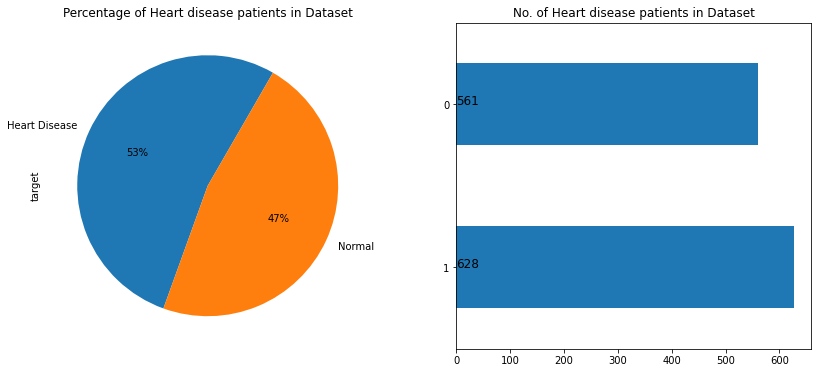

In [15]:
# Plotting the attributes of target
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, sharey=False, figsize=(14,6))

ax1 = df['target'].value_counts().plot.pie( x="Heart disease" ,y ='no.of patients', 
                   autopct = "%1.0f%%",labels=["Heart Disease","Normal"], startangle = 60,ax=ax1);
ax1.set(title = 'Percentage of Heart disease patients in Dataset')

ax2 = df["target"].value_counts().plot(kind="barh" ,ax =ax2)
for i,j in enumerate(df["target"].value_counts().values):
    ax2.text(.5,i,j,fontsize=12)
ax2.set(title = 'No. of Heart disease patients in Dataset')
plt.show()


The dataset is balanced having 629 heart disease patients and 561 normal patients

### Checking Gender and Agewise Distribution

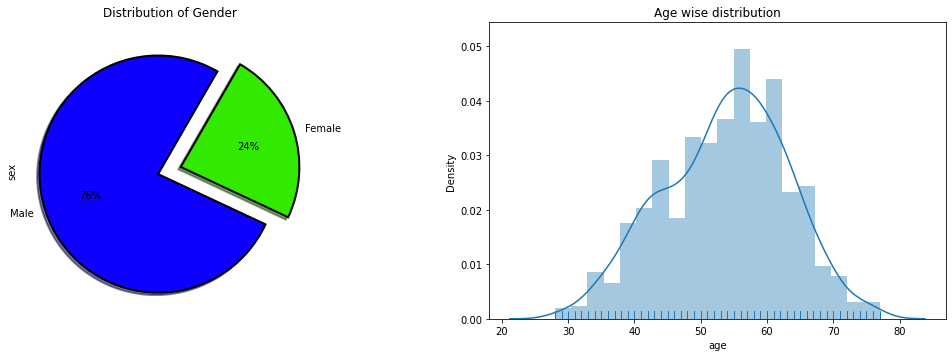

In [16]:
plt.figure(figsize=(18,12))
plt.subplot(221)
df["sex"].value_counts().plot.pie(autopct = "%1.0f%%",colors = sns.color_palette("prism",5),startangle = 60,labels=["Male","Female"],
wedgeprops={"linewidth":2,"edgecolor":"k"},explode=[.1,.1],shadow =True)
plt.title("Distribution of Gender")
plt.subplot(222)

ax= sns.distplot(df['age'], rug=True)
plt.title("Age wise distribution")
plt.show()

As we can see from above plot, in this dataset males percentage is way too higher than females where as average age of patients is around 55.

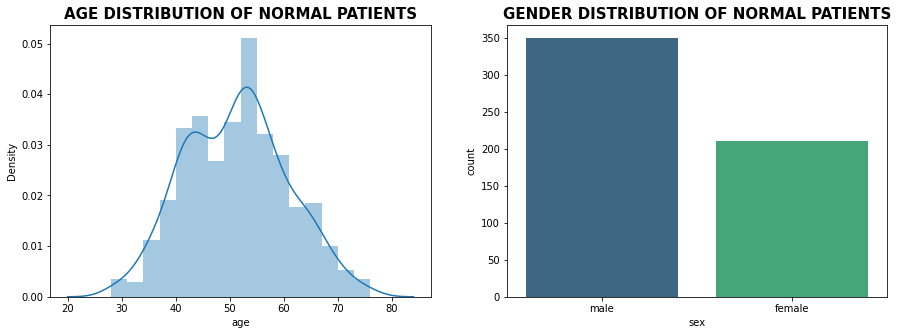

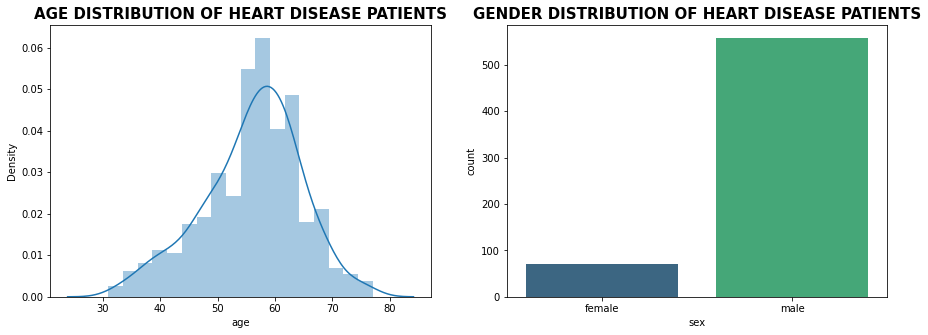

In [17]:
# creating separate df for normal and heart patients

attr_1=df[df['target']==1]

attr_0=df[df['target']==0]

# plotting normal patients
fig = plt.figure(figsize=(15,5))
ax1 = plt.subplot2grid((1,2),(0,0))
sns.distplot(attr_0['age'])
plt.title('AGE DISTRIBUTION OF NORMAL PATIENTS', fontsize=15, weight='bold')

ax1 = plt.subplot2grid((1,2),(0,1))
sns.countplot(attr_0['sex'], palette='viridis')
plt.title('GENDER DISTRIBUTION OF NORMAL PATIENTS', fontsize=15, weight='bold' )
plt.show()

#plotting heart patients

fig = plt.figure(figsize=(15,5))
ax1 = plt.subplot2grid((1,2),(0,0))
sns.distplot(attr_1['age'])
plt.title('AGE DISTRIBUTION OF HEART DISEASE PATIENTS', fontsize=15, weight='bold')

ax1 = plt.subplot2grid((1,2),(0,1))
sns.countplot(attr_1['sex'], palette='viridis')
plt.title('GENDER DISTRIBUTION OF HEART DISEASE PATIENTS', fontsize=15, weight='bold' )
plt.show()

As we can see from above plot more male patients accounts for heart disease in comparison to females whereas mean age for heart disease patients is around 58 to 60 years

# Distribution of Chest Pain type

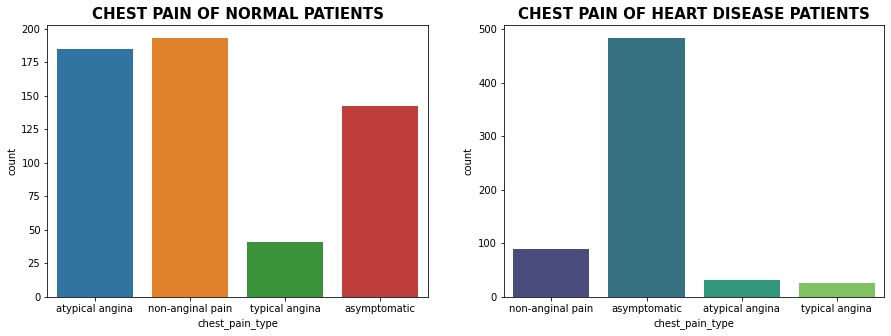

In [18]:
# plotting normal patients
fig = plt.figure(figsize = (15,5))
ax1 = plt.subplot2grid((1,2),(0,0))
sns.countplot(attr_0['chest_pain_type'])
plt.title('CHEST PAIN OF NORMAL PATIENTS',fontsize = 15, weight='bold')

# plotting heart patients
ax1 = plt.subplot2grid((1,2),(0,1))
sns.countplot(attr_1['chest_pain_type'],palette = 'viridis')
plt.title('CHEST PAIN OF HEART DISEASE PATIENTS',fontsize = 15, weight='bold')
plt.show()

In [19]:
# Exploring the Heart Disease patients based on Chest Pain Type
plot_criteria = ['chest_pain_type','target']
cm = sns.light_palette("red",as_cmap=True)
(round(pd.crosstab(df[plot_criteria[0]], df[plot_criteria[1]], normalize='columns') * 100,2)).style.background_gradient(cmap = cm)

target,0,1
chest_pain_type,,
asymptomatic,25.310000,76.910000
atypical angina,32.980000,4.940000
non-anginal pain,34.400000,14.170000
typical angina,7.310000,3.980000


As we can see from above plot 76% of the chest pain type of the heart disease patients have asymptomatic chest pain.

Asymptomatic heart attacks medically known as silent myocardial infarction (SMI) annually accounts for around 45-50% of morbidities due to cardiac ailments and even premature deaths in India. The incidences among middle aged people experiencing SMI is twice likely to develop in males than females. The symptoms of SMI being very mild in comparison to an actual heart attack; it is described as a silent killer. Unlike the symptoms in a normal heart attack which includes extreme chest pain, stabbing pain in the arms, neck & jaw, sudden shortness of breath, sweating and dizziness, the symptoms of SMI are very brief and hence confused with regular discomfort and most often ignored

## Distribution of REST ECG

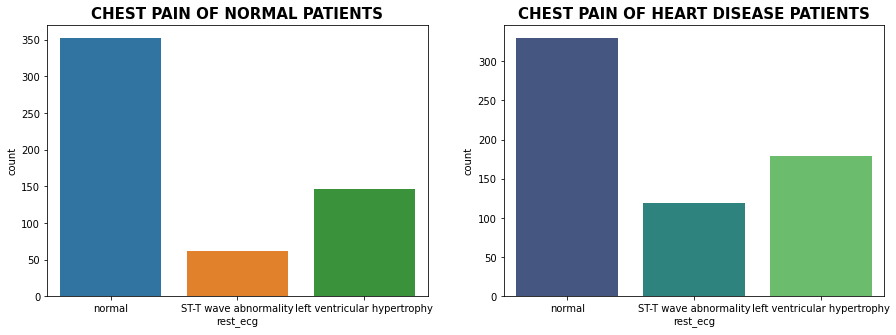

In [20]:
# plotting normal patients
fig = plt.figure(figsize = (15,5))
ax1 = plt.subplot2grid((1,2),(0,0))
sns.countplot(attr_0['rest_ecg'])
plt.title('CHEST PAIN OF NORMAL PATIENTS',fontsize = 15, weight='bold')

# plotting heart patients
ax1 = plt.subplot2grid((1,2),(0,1))
sns.countplot(attr_1['rest_ecg'],palette = 'viridis')
plt.title('CHEST PAIN OF HEART DISEASE PATIENTS',fontsize = 15, weight='bold')
plt.show()

In [21]:
# Exploring the Heart Disease patients based on REST ECG
plot_criteria = ['rest_ecg','target']
cm = sns.light_palette("red",as_cmap=True)
(round(pd.crosstab(df[plot_criteria[0]], df[plot_criteria[1]], normalize='columns') * 100,2)).style.background_gradient(cmap = cm)

target,0,1
rest_ecg,,
ST-T wave abnormality,11.050000,18.950000
left ventricular hypertrophy,26.020000,28.500000
normal,62.920000,52.550000


<img src="images/Heart_st_image.jpg"></img>
<img src="images/Heart_st_images.jpg" width="400px"></img>
An electrocardiogram records the electrical signals in your heart. It's a common test used to detect heart problems and monitor the heart's status in many situations. Electrocardiograms — also called ECGs or EKGs, but ECG has limits. It measures heart rate and rhythm—but it doesn’t necessarily show blockages in the arteries.Thats why in this dataset around 52% heart disease patients have normal ECG

## Distribution of ST slope

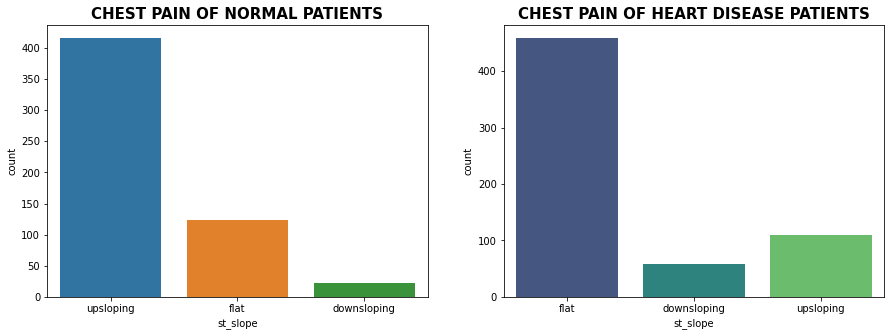

In [22]:
# plotting normal patients
fig = plt.figure(figsize = (15,5))
ax1 = plt.subplot2grid((1,2),(0,0))
sns.countplot(attr_0['st_slope'])
plt.title('CHEST PAIN OF NORMAL PATIENTS',fontsize = 15, weight='bold')

# plotting heart patients
ax1 = plt.subplot2grid((1,2),(0,1))
sns.countplot(attr_1['st_slope'],palette = 'viridis')
plt.title('CHEST PAIN OF HEART DISEASE PATIENTS',fontsize = 15, weight='bold')
plt.show()

In [23]:
# Exploring the Heart Disease patients based on ST slope
plot_criteria = ['st_slope','target']
cm = sns.light_palette("red",as_cmap=True)
(round(pd.crosstab(df[plot_criteria[0]], df[plot_criteria[1]], normalize='columns') * 100,2)).style.background_gradient(cmap = cm)

target,0,1
st_slope,,
downsloping,3.920000,9.390000
flat,21.930000,73.090000
upsloping,74.150000,17.520000


The ST segment /heart rate slope (ST/HR slope), has been proposed as a more accurate ECG criterion for diagnosing significant coronary artery disease (CAD) in most of the research papers. 

As we can see from above plot upsloping is positive sign as 74% of the normal patients have upslope where as 73.09% heart patients have flat sloping.

## Distribution of Numerical features

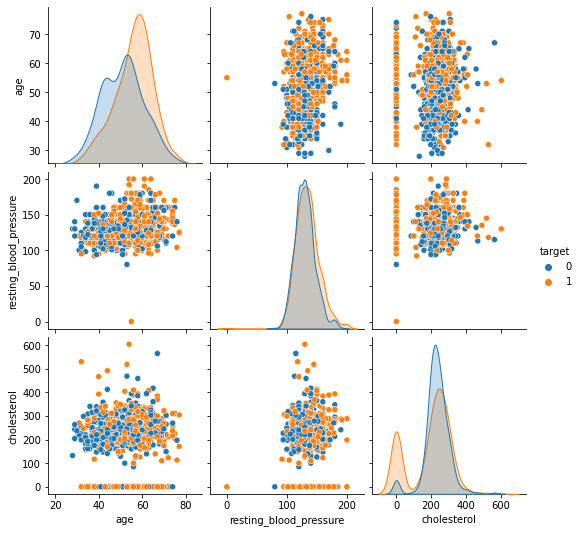

In [24]:
sns.pairplot(df, hue='target', vars=['age','resting_blood_pressure','cholesterol'])

From the above plot it is clear that as the age increases chances of heart disease increases

<AxesSubplot:xlabel='resting_blood_pressure', ylabel='cholesterol'>

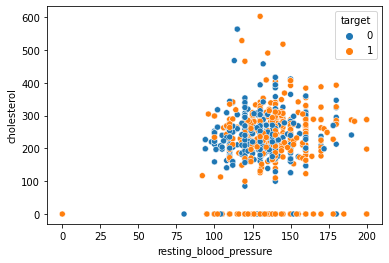

In [25]:
sns.scatterplot(data = df,x='resting_blood_pressure',y='cholesterol',hue='target')

From the above plot we can see outliers clearly as for some of the patients cholestrol is 0 whereas for one patient both cholestrol and resting bp is 0 which is may be due to missing entries we will filter these ouliers later

# 6. Outlier Detection and Removal

### Detecting outlier using z-score

<img src="images/outlier-zscore.jpg" width=500>

In [26]:
# filtering numeric features as age , resting bp, cholestrol and max heart rate achieved has outliers as per EDA

df_numeric = df[['age','resting_blood_pressure','cholesterol','max_heart_rate_achieved']]

In [27]:
df_numeric.head()

,age,resting_blood_pressure,cholesterol,max_heart_rate_achieved
0,40,140,289,172
1,49,160,180,156
2,37,130,283,98
3,48,138,214,108
4,54,150,195,122


In [28]:
# calculating zscore of numeric columns in the dataset
z = np.abs(stats.zscore(df_numeric))
print(z)

           age  resting_blood_pressure  cholesterol  max_heart_rate_achieved
0     1.466266                0.428136     0.775228                 1.264301
1     0.503599                1.517370     0.299516                 0.637259
2     1.787155                0.116481     0.716067                 1.635766
3     0.610562                0.319212     0.035725                 1.243865
4     0.031216                0.972753     0.151616                 0.695204
...        ...                     ...          ...                      ...
1185  0.931451                1.205715     0.528727                 0.303303
1186  1.528698                0.645983     0.171336                 0.049408
1187  0.352105                0.116481     0.782658                 0.969535
1188  0.352105                0.116481     0.252646                 1.342681
1189  1.680192                0.319212     0.348816                 1.303491

[1189 rows x 4 columns]


from these points it is difficult to say which points are outliers so we will now define threshold

In [29]:
# Defining threshold for filtering outliers 
threshold = 3
print(np.where(z > 3))

(array([  30,   76,  109,  149,  242,  366,  371,  391,  400,  450,  592,
        617,  733,  760, 1012, 1038, 1074], dtype=int64), array([2, 2, 1, 2, 1, 1, 3, 3, 1, 1, 1, 2, 1, 1, 1, 2, 1], dtype=int64))


The first array contains the list of row numbers and second array respective column numbers, which mean z[30][2] have a Z-score higher than 3. There are total 17 data points which are outliers.

In [30]:
# filtering outliers retaining only those data points which are below threshold
df = df[(z<3).all(axis=1)]

In [31]:
# checking shape of dataset after outlier removal
df.shape

(1172, 12)

All the 17 data points which are outliers are now removed.

Now before splitting dataset into train and test we first encode categorical variables as dummy variables(one hot encoding) and segregate feature and target variable.

In [32]:
# Encoding categorical variables
df = pd.get_dummies(df,drop_first=True)
df.head()

,age,resting_blood_pressure,cholesterol,fasting_blood_sugar,max_heart_rate_achieved,exercise_induced_angina,st_depression,target,sex_male,chest_pain_type_atypical angina,chest_pain_type_non-anginal pain,chest_pain_type_typical angina,rest_ecg_left ventricular hypertrophy,rest_ecg_normal,st_slope_flat,st_slope_upsloping
0,40,140,289,0,172,0,0.0,0,1,1,0,0,0,1,0,1
1,49,160,180,0,156,0,1.0,1,0,0,1,0,0,1,1,0
2,37,130,283,0,98,0,0.0,0,1,1,0,0,0,0,0,1
3,48,138,214,0,108,1,1.5,1,0,0,0,0,0,1,1,0
4,54,150,195,0,122,0,0.0,0,1,0,1,0,0,1,0,1


In [33]:
# 48,138,214,0,108,1,1.5,0,0,0,0,0,1,1,0
# checking the shape of dataset
df.shape

(1172, 16)

In [34]:
# segregating dataset into features i.e., X and target variables i.e., y
X = df.drop(['target'],axis=1)
y = df['target']

# Checking Correlation

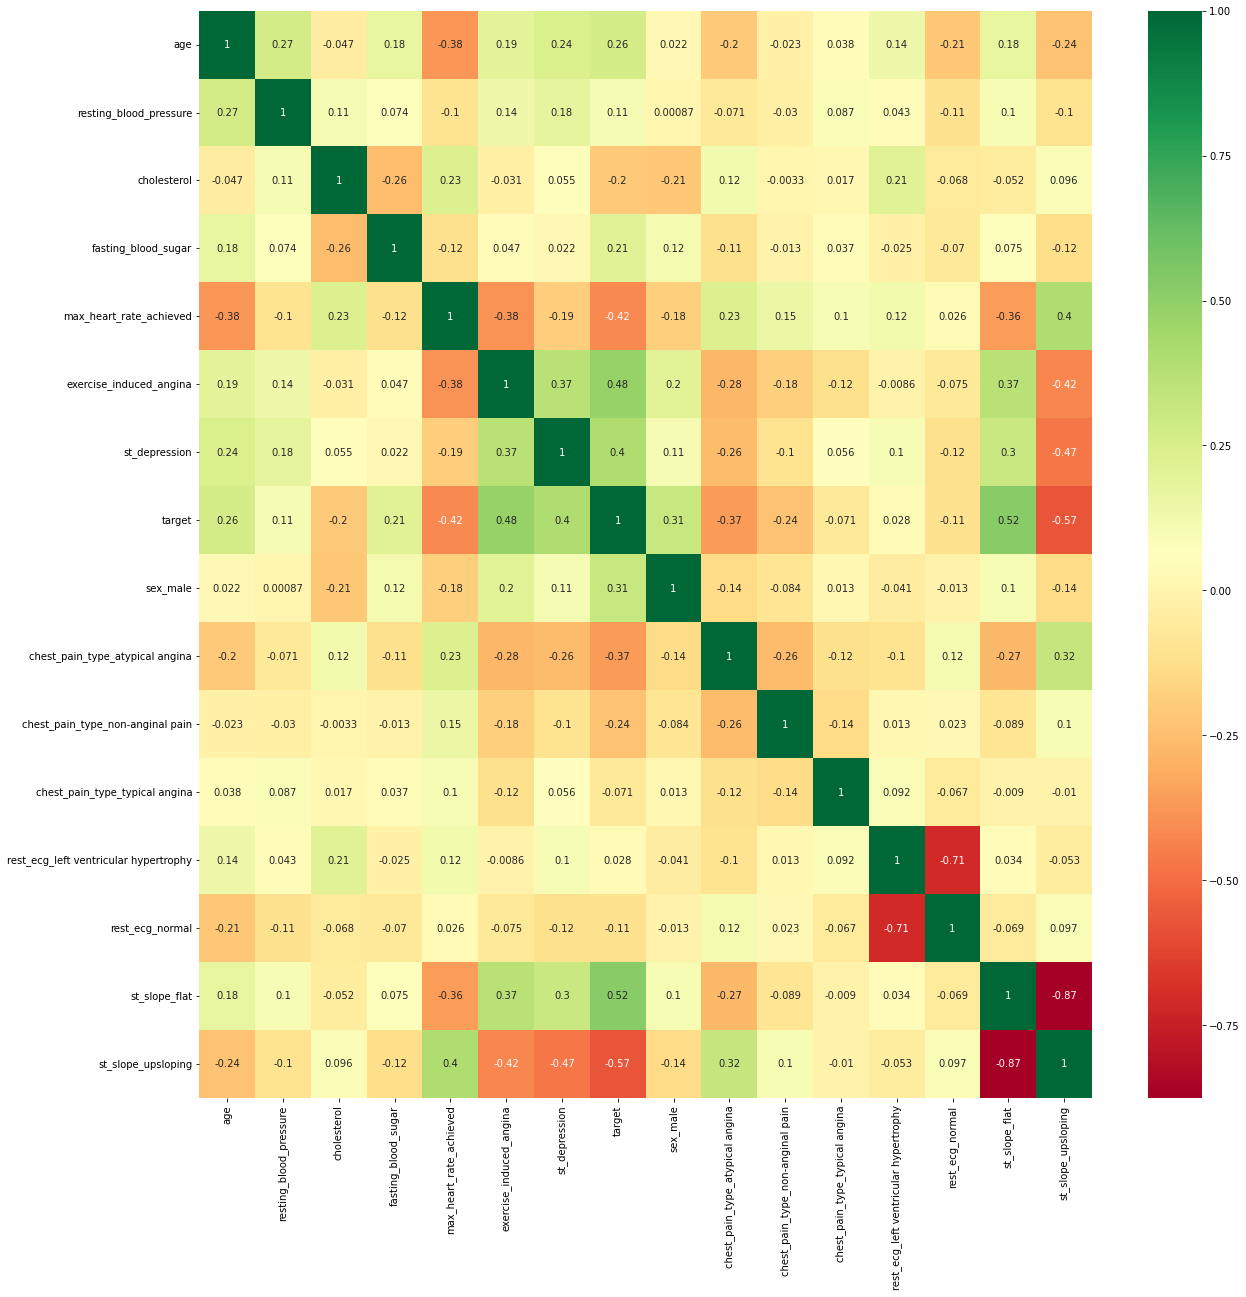

In [35]:
# get correlations of each features in dataset
plt.figure(figsize = (20,20))
# Plot heat map
g = sns.heatmap(df.corr(), annot = True, cmap = "RdYlGn")

<AxesSubplot:title={'center':'Correlation with Heart Disease'}>

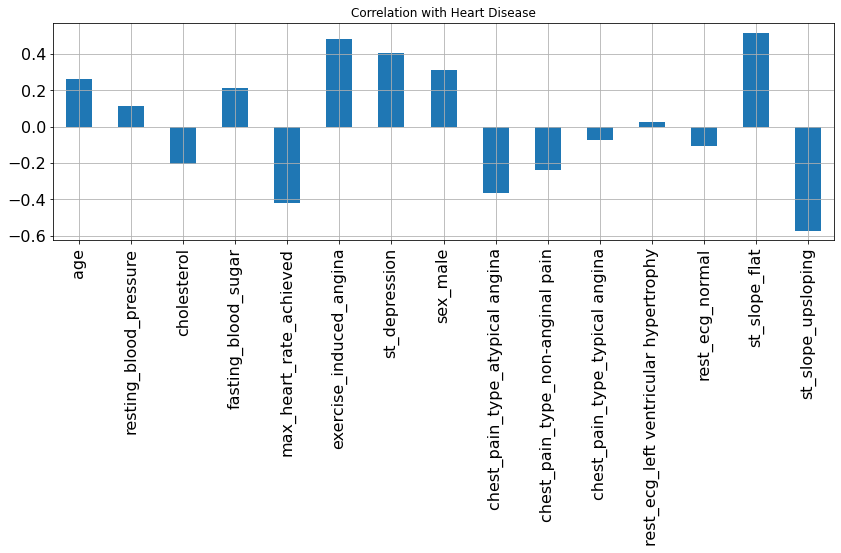

In [36]:
# Correlation with Response Variable class

X.corrwith(y).plot.bar(figsize = (14,4),title="Correlation with Heart Disease",fontsize= 16,rot=90, grid= True)

From above plot it is clear that age, exercise_induced_angina, st_depression and st_slope_flat has highest Positive relationship with heart disease and st_slope_upsloping , max_heart_rate_achieved has highest Negative relationship with heart disease

# 7. Train Test Split

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

In [38]:
## checking distribution of target variable in train test split
print('Distribution of target variable in training set')
print(y_train.value_counts())

print('Distribution of target variable in test set')
print(y_test.value_counts())

Distribution of target variable in training set
1    491
0    446
Name: target, dtype: int64
Distribution of target variable in test set
1    123
0    112
Name: target, dtype: int64


In [39]:
print('------------Training Set------------------')
print(X_train.shape)
print(y_train.shape)

print('------------Test Set------------------')
print(X_test.shape)
print(y_test.shape)

------------Training Set------------------
(937, 15)
(937,)
------------Test Set------------------
(235, 15)
(235,)


## Feature Normalization

In this step we will normalize all the numeric feature in the range of 0 to 1

In [40]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train[['age','resting_blood_pressure','cholesterol','max_heart_rate_achieved','st_depression']] = scaler.fit_transform(X_train[['age','resting_blood_pressure','cholesterol','max_heart_rate_achieved','st_depression']])
X_train.head()

,age,resting_blood_pressure,cholesterol,fasting_blood_sugar,max_heart_rate_achieved,exercise_induced_angina,st_depression,sex_male,chest_pain_type_atypical angina,chest_pain_type_non-anginal pain,chest_pain_type_typical angina,rest_ecg_left ventricular hypertrophy,rest_ecg_normal,st_slope_flat,st_slope_upsloping
907,0.734694,0.175824,0.450855,0,0.570370,1,0.500000,1,0,0,1,1,0,1,0
239,0.408163,0.725275,0.758547,0,0.237037,1,0.522727,1,0,0,0,0,1,1,0
991,0.428571,0.285714,0.401709,0,0.533333,0,0.522727,1,0,1,0,0,1,1,0
71,0.326531,0.395604,0.459402,0,0.503704,0,0.295455,1,1,0,0,0,1,0,1
570,0.551020,0.703297,0.463675,0,0.318519,1,0.579545,1,0,0,0,0,1,1,0


In [41]:
X_test[['age','resting_blood_pressure','cholesterol','max_heart_rate_achieved','st_depression']] = scaler.transform(X_test[['age','resting_blood_pressure','cholesterol','max_heart_rate_achieved','st_depression']])
X_test.head()

,age,resting_blood_pressure,cholesterol,fasting_blood_sugar,max_heart_rate_achieved,exercise_induced_angina,st_depression,sex_male,chest_pain_type_atypical angina,chest_pain_type_non-anginal pain,chest_pain_type_typical angina,rest_ecg_left ventricular hypertrophy,rest_ecg_normal,st_slope_flat,st_slope_upsloping
23,0.326531,0.615385,0.615385,0,0.614815,1,0.636364,1,1,0,0,0,1,1,0
375,0.673469,0.340659,0.000000,0,0.281481,1,0.295455,1,0,0,0,0,1,0,0
629,0.326531,0.505495,0.502137,0,0.837037,0,0.295455,1,0,1,0,1,0,0,1
22,0.428571,0.329670,0.429487,0,0.718519,0,0.295455,0,1,0,0,0,1,0,1
488,0.591837,0.505495,0.457265,0,0.570370,1,0.522727,1,0,0,0,0,0,1,0


# 8. Cross Validation

In this step, we will build different baseline models and perform 10-fold cross validation to filter top performing baseline models to be used.

In [42]:
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
import xgboost

# function initializing baseline machine learning models
def GetBasedModel():
    basedModels = []
    basedModels.append(('LR_L2', LogisticRegression(penalty='l2')))
    basedModels.append(('KNN7', KNeighborsClassifier(7)))
    basedModels.append(('KNN5', KNeighborsClassifier(5)))
    basedModels.append(('KNN9', KNeighborsClassifier(9)))
    basedModels.append(('KNN11', KNeighborsClassifier(11)))
    basedModels.append(('Rf_Ent100',RandomForestClassifier(criterion='entropy',n_estimators=100)))
    basedModels.append(('Rf_Gini100',RandomForestClassifier(criterion='gini',n_estimators=100)))
#     basedModels.append(('XGB_2000',xgb.XGBClassifier(n_estimators=2000)))
#     basedModels.append(('XGB_500',xgb.XGBClassifier(n_estimators=500)))
#     basedModels.append(('XGB_100',xgb.XGBClassifier(n_estimators=100)))
#     basedModels.append(('XGB_1000',xgb.XGBClassifier(n_estimators=1000)))
    return basedModels

# function for performing 10-fold cross validation of all the baseline models
def BasedLine2(X_train, y_train,models):
    # Test options and evaluation metric
    num_folds = 10
    scoring = 'accuracy'
    seed = 7
    results = []
    names = []
    for name, model in models:
        kfold = model_selection.KFold(n_splits=10, random_state=None)
        cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
        results.append(cv_results)
        names.append(name)
        msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
        print(msg)
         
        
    return results,msg

In [43]:
models = GetBasedModel()
names,results = BasedLine2(X_train,y_train,models)

LR_L2: 0.846465 (0.049185)
KNN7: 0.830359 (0.048253)
KNN5: 0.849600 (0.043500)
KNN9: 0.839957 (0.031365)
KNN11: 0.840014 (0.043842)
Rf_Ent100: 0.930748 (0.038060)
Rf_Gini100: 0.933962 (0.039958)


# 9. Model Building

### Random Forest Classifier (criterion='entropy')

In [44]:
rf_ent = RandomForestClassifier(criterion='entropy',n_estimators=100)
rf_ent.fit(X_train, y_train)
y_pred_rfe = rf_ent.predict(X_test)

### Random Forest Classifier (criterion=''Gini")

In [45]:
rf_ent = RandomForestClassifier(criterion='gini',n_estimators=100)
rf_ent.fit(X_train, y_train)
y_pred_rfe = rf_ent.predict(X_test)

### K Nearest negihbor (n = 5)

In [46]:
knn = KNeighborsClassifier(5)
knn.fit(X_train,y_train)
y_pred_knn = knn.predict(X_test)

### Logistic Regression

In [47]:
log_res = LogisticRegression()
log_res.fit(X_train,y_train)
y_pred_Log_res = log_res.predict(X_test)

# 10. Model Evalution

In this step we will first define which evaluation metrics we will use to evaluate our model. The most important evaluation metric for this problem domain is **sensitivity, specificity, Precision, F1-measure, Geometric mean and mathew correlation coefficient and finally ROC AUC curve**

### Mathew Correlation coefficient (MCC)

The Matthews correlation coefficient (MCC), instead, is a more reliable statistical rate which produces a high score only if the prediction obtained good results in all of the four confusion matrix categories (true positives, false negatives, true negatives, and false positives), proportionally both to the size of positive elements and the size of negative elements in the dataset.

<img src="images/Mcc img.jpg">

### F1 Score

 F1 Score is the weighted average of Precision and Recall. Therefore, this score takes both false positives and false negatives into account. Intuitively it is not as easy to understand as accuracy, but F1 is usually more useful than accuracy, especially if you have an uneven class distribution. Accuracy works best if false positives and false negatives have similar cost. If the cost of false positives and false negatives are very different, it’s better to look at both Precision and Recall. In our case, F1 score is 0.701.
 
<img src="images/f1 score.png" width=500>

### Log Loss

Logarithmic loss measures the performance of a classification model where the prediction input is a probability value between 0 and 1. The goal of our machine learning models is to minimize this value. A perfect model would have a log loss of 0. Log loss increases as the predicted probability diverges from the actual label. So predicting a probability of .012 when the actual observation label is 1 would be bad and result in a high log loss.

### Confusion Matrix

,Model,Accuracy,Precision,Sensitivity,Specificity,F1 Score,ROC,Log_Loss,mathew_corrcoef
0,Random Forest,0.931915,0.92126,0.95122,0.910714,0.936,0.930967,2.35161,0.863817


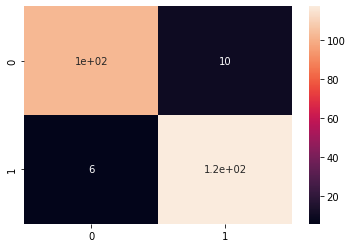

In [48]:
CM = confusion_matrix(y_test, y_pred_rfe)
sns.heatmap(CM, annot = True)

TN = CM[0][0]
FN = CM[1][0]
TP = CM[1][1]
FP = CM[0][1]

specificity = TN/(TN+FP)
loss_log = log_loss(y_test, y_pred_rfe)
acc= accuracy_score(y_test, y_pred_rfe)
roc=roc_auc_score(y_test, y_pred_rfe)
prec = precision_score(y_test, y_pred_rfe)
rec = recall_score(y_test, y_pred_rfe)
f1 = f1_score(y_test, y_pred_rfe)
mathew = matthews_corrcoef(y_test, y_pred_rfe)

model_results =pd.DataFrame([['Random Forest',acc, prec,rec,specificity, f1,roc, loss_log,mathew]],
               columns = ['Model', 'Accuracy','Precision', 'Sensitivity','Specificity', 'F1 Score','ROC','Log_Loss','mathew_corrcoef'])

model_results

1.0 × 10-2 = 1E-02 = 0.01. 1.0 × 10-3 = 1E-03 = 0.001 [1e + 02]

,Model,Accuracy,Precision,Sensitivity,Specificity,F1 Score,ROC,Log_Loss,mathew_corrcoef
0,KNeighbors Classifier,0.846809,0.837209,0.878049,0.8125,0.857143,0.845274,5.291118,0.69312


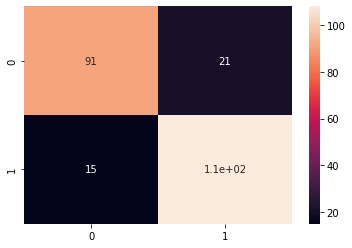

In [49]:
CM = confusion_matrix(y_test, y_pred_knn)
sns.heatmap(CM, annot = True)

TN = CM[0][0]
FN = CM[1][0]
TP = CM[1][1]
FP = CM[0][1]

specificity = TN/(TN+FP)
loss_log = log_loss(y_test, y_pred_knn)
acc= accuracy_score(y_test, y_pred_knn)
roc=roc_auc_score(y_test, y_pred_knn)
prec = precision_score(y_test, y_pred_knn)
rec = recall_score(y_test, y_pred_knn)
f1 = f1_score(y_test, y_pred_knn)
mathew = matthews_corrcoef(y_test, y_pred_knn)

model_results =pd.DataFrame([['KNeighbors Classifier',acc, prec,rec,specificity, f1,roc, loss_log,mathew]],
               columns = ['Model', 'Accuracy','Precision', 'Sensitivity','Specificity', 'F1 Score','ROC','Log_Loss','mathew_corrcoef'])

model_results

### Comparision with other Models

In [50]:
data = {        'RFE': y_pred_rfe,
                'KNN': y_pred_knn, 
                'Log_res': y_pred_Log_res
                 }

models = pd.DataFrame(data) 
 
for column in models:
    CM=confusion_matrix(y_test,models[column])
    
    TN = CM[0][0]
    FN = CM[1][0]
    TP = CM[1][1]
    FP = CM[0][1]
    specificity = TN/(TN+FP)
    loss_log = log_loss(y_test, models[column])
    acc= accuracy_score(y_test, models[column])
    roc=roc_auc_score(y_test, models[column])
    prec = precision_score(y_test, models[column])
    rec = recall_score(y_test, models[column])
    f1 = f1_score(y_test, models[column])
    
    mathew = matthews_corrcoef(y_test, models[column])
    results =pd.DataFrame([[column,acc, prec,rec,specificity, f1,roc, loss_log,mathew]],
               columns = ['Model', 'Accuracy','Precision', 'Sensitivity','Specificity', 'F1 Score','ROC','Log_Loss','mathew_corrcoef'])
    model_results = model_results.append(results, ignore_index = True)

model_results


,Model,Accuracy,Precision,Sensitivity,Specificity,F1 Score,ROC,Log_Loss,mathew_corrcoef
0,KNeighbors Classifier,0.846809,0.837209,0.878049,0.812500,0.857143,0.845274,5.291118,0.693120
1,RFE,0.931915,0.921260,0.951220,0.910714,0.936000,0.930967,2.351610,0.863817
2,KNN,0.846809,0.837209,0.878049,0.812500,0.857143,0.845274,5.291118,0.693120
3,Log_res,0.825532,0.830645,0.837398,0.812500,0.834008,0.824949,6.025986,0.650182


### Findings
AS we can see from above results, Random Forest Classifier is best performer as it has highest test accuracy of 0.9234, sensitivity of 0.9512 and specificity of 0.892 and highest f1-score of 0.9285 and lowest Log Loss of 2.64.

### ROC AUC Curve

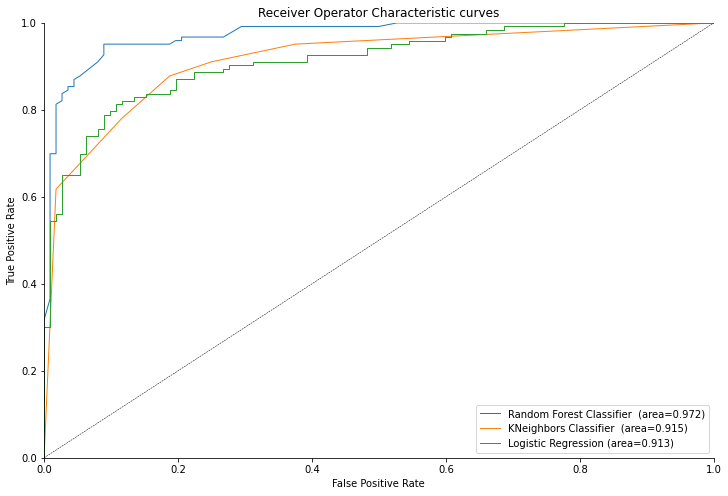

In [51]:
def roc_auc_plot(y_true, y_proba, label=' ', l='-', lw=1.0):
    from sklearn.metrics import roc_curve, roc_auc_score
    fpr, tpr, _ = roc_curve(y_true, y_proba[:,1])
    ax.plot(fpr, tpr, linestyle=l, linewidth=lw,
            label="%s (area=%.3f)"%(label,roc_auc_score(y_true, y_proba[:,1])))

f, ax = plt.subplots(figsize=(12,8))


roc_auc_plot(y_test,rf_ent.predict_proba(X_test),label='Random Forest Classifier ',l='-')
roc_auc_plot(y_test,knn.predict_proba(X_test),label='KNeighbors Classifier ',l='-')
roc_auc_plot(y_test,log_res.predict_proba(X_test),label='Logistic Regression',l='-')

ax.plot([0,1], [0,1], color='k', linewidth=0.5, linestyle='--', 
        )    
ax.legend(loc="lower right")    
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])
ax.set_title('Receiver Operator Characteristic curves')
sns.despine()

As we can see highest average area under the curve (AUC) of 0.973 is attained by Random Forest Classifier 

### Precision Recall curve

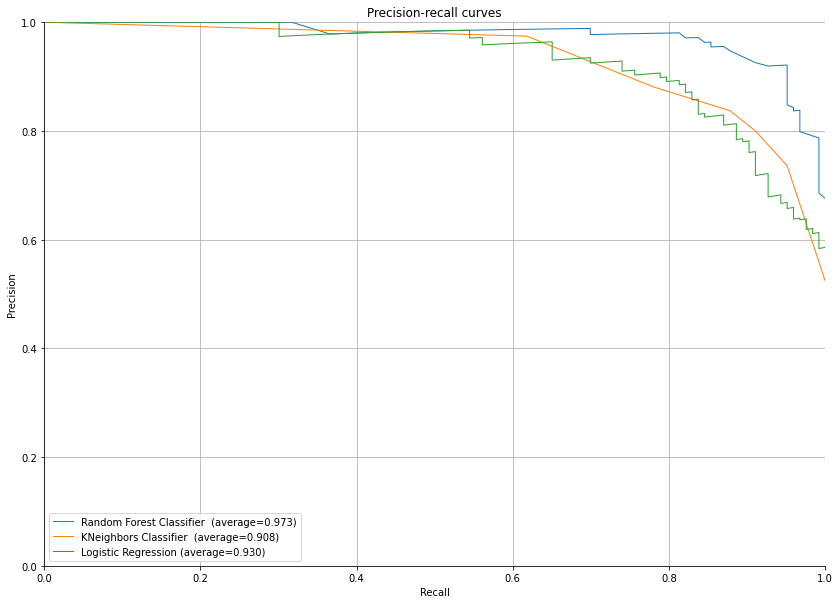

In [52]:
def precision_recall_plot(y_true, y_proba, label=' ', l='-', lw=1.0):
    from sklearn.metrics import precision_recall_curve, average_precision_score
    precision, recall, _ = precision_recall_curve(y_test,
                                                  y_proba[:,1])
    average_precision = average_precision_score(y_test, y_proba[:,1],
                                                     average="micro")
    ax.plot(recall, precision, label='%s (average=%.3f)'%(label,average_precision),
            linestyle=l, linewidth=lw)

f, ax = plt.subplots(figsize=(14,10))

precision_recall_plot(y_test,rf_ent.predict_proba(X_test),label='Random Forest Classifier ',l='-')
precision_recall_plot(y_test,knn.predict_proba(X_test),label='KNeighbors Classifier ',l='-')
precision_recall_plot(y_test,log_res.predict_proba(X_test),label='Logistic Regression',l='-')
ax.set_xlabel('Recall')
ax.set_ylabel('Precision')
ax.legend(loc="lower left")
ax.grid(True)
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])
ax.set_title('Precision-recall curves')
sns.despine()

<AxesSubplot:>

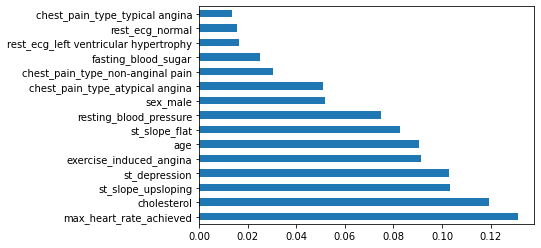

In [53]:
feat_importances = pd.Series(rf_ent.feature_importances_, index=X_train.columns)
feat_importances.nlargest(20).plot(kind='barh')

### 11. Feature Selection

In [54]:
# segregating dataset into features i.e., X and target variables i.e., y

X = df.drop(['target','resting_blood_pressure','sex_male','chest_pain_type_non-anginal pain','chest_pain_type_atypical angina'],axis=1)
y = df['target']

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2,shuffle=True, random_state=5)

In [56]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train[['age','cholesterol','max_heart_rate_achieved','st_depression']] = scaler.fit_transform(X_train[['age','cholesterol','max_heart_rate_achieved','st_depression']])
X_train.head()

,age,cholesterol,fasting_blood_sugar,max_heart_rate_achieved,exercise_induced_angina,st_depression,chest_pain_type_typical angina,rest_ecg_left ventricular hypertrophy,rest_ecg_normal,st_slope_flat,st_slope_upsloping
478,0.673469,0.000000,1,0.303704,1,0.454545,0,0,1,0,0
253,0.673469,0.594705,0,0.355556,1,0.194805,0,0,0,0,1
273,0.551020,0.409369,0,0.466667,1,0.584416,0,0,1,1,0
111,0.591837,0.519348,0,0.185185,1,0.584416,0,0,1,1,0
50,0.448980,0.474542,0,0.400000,1,0.454545,0,0,1,1,0


In [57]:
y_test.head()

1024    1
182     0
785     0
924     1
780     1
Name: target, dtype: int64

In [58]:
X_test[['age','cholesterol','max_heart_rate_achieved','st_depression']] = scaler.transform(X_test[['age','cholesterol','max_heart_rate_achieved','st_depression']])
X_test.head()

,age,cholesterol,fasting_blood_sugar,max_heart_rate_achieved,exercise_induced_angina,st_depression,chest_pain_type_typical angina,rest_ecg_left ventricular hypertrophy,rest_ecg_normal,st_slope_flat,st_slope_upsloping
1024,0.693878,0.572301,0,0.266667,0,0.376623,0,1,0,1,0
182,0.469388,0.456212,0,0.614815,0,0.194805,0,0,1,0,1
785,0.346939,0.480652,0,0.629630,1,0.220779,0,1,0,1,0
924,0.591837,0.562118,0,0.333333,1,0.272727,0,1,0,1,0
780,0.612245,0.527495,0,0.466667,1,0.584416,0,1,0,1,0


In [59]:
models = GetBasedModel()
names,results = BasedLine2(X_train, y_train,models)

LR_L2: 0.822878 (0.047967)
KNN7: 0.807904 (0.044339)
KNN5: 0.803660 (0.045820)
KNN9: 0.815374 (0.036848)
KNN11: 0.809037 (0.042388)
Rf_Ent100: 0.924239 (0.023010)
Rf_Gini100: 0.916792 (0.031041)


# Random Forest Classifier (criterion="Entropy")

In [67]:
rf_ent = RandomForestClassifier(criterion='entropy',n_estimators=100)
rf_ent.fit(X_train, y_train)
y_pred_rfe = rf_ent.predict(X_test)

## 12. Conclusion

The best performing Classifier is **Random Forest Classifier Algorithm**
 The top 5 most contribution features are:
1. **Max heart Rate achieved**<br>
2. **Cholestrol**<br>
3. **st_depression**<br>
4. **exercise_induced_angina**<br>
5. **Age**<br>

## 13. Saving the model

In [61]:
from joblib import dump
dump(rf_ent, 'Heart_model.joblib') 

['Heart_model.joblib']

## Using the model to perdict label for given features

In [68]:
from joblib import dump, load
import numpy as np
model = load('Heart_model.joblib') 

# 15 features Model
# features = np.array([[54,150,195,0,122,0,0.0,0,1,0,1,0,0,1,0]])
# features = np.array([[0.591837,0.505495,0.457265,0,0.570370,1,0.522727,1,0,0,0,0,0,1,0]])

# 11 features Model
features = np.array([[0.469388,0.433809,0,0.429630,1,0.376623,1,1,0,0,1]])
features = np.array([[0.612245,0.527495,0,0.466667,1,0.584416,0,1,0,1,0]])

perdiction = model.predict(features)

if (perdiction):
    print("There are Chances of Heart Disease! Consult your Doctor Soon!")
else:
    print('NO fear of Heart Disease But for Better Understanding can Consult your Doctor!')

There are Chances of Heart Disease! Consult your Doctor Soon!
